In [2]:
import logging
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation, FuncAnimation
from tqdm import tqdm

from datasets import CubeObstacle, CylinderObstacle
from utils.config import Hyperparameters as hparams
from utils.tools import calc_sig_strength

np.random.seed(52)
logging.basicConfig(level=logging.INFO)

In [3]:
# Create Obstacle

obstacle_ls = [
    CubeObstacle(-30, 15, 35, 60, 20),
    CubeObstacle(-30, -25, 45, 10, 35),
    CylinderObstacle(0, -30, 70, 10)
]

In [4]:
# Create Ground Nodes

gnd_nodes = []
while True:
    if len(gnd_nodes) == hparams.num_node:
        break
    x = np.random.randint(-hparams.area_size // 2, hparams.area_size // 2)
    y = np.random.randint(-hparams.area_size // 2, hparams.area_size // 2)
    z = 0

    if (x, y) not in gnd_nodes:
        is_inside = False
        for obstacle in obstacle_ls:
            if is_inside := obstacle.is_inside(x, y, z):
                break
        if not is_inside: gnd_nodes.append((x, y, z))

INFO:root:Obstacle.points.shape: (3, 340)
INFO:root:Obstacle.points.shape: (3, 217)
INFO:root:Obstacle.points.shape: (3, 234)
INFO:root:gnd_nodes: [[-55 -39   0]
 [-84  61   0]
 [ 73 -79   0]
 [ 92  13   0]]


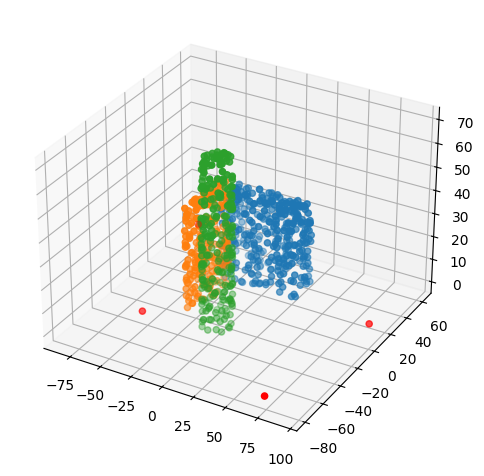

In [5]:
# environment visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for obstacle in obstacle_ls:
    obstacle.plot(ax)
    logging.info(f"Obstacle.points.shape: {obstacle.points.shape}")

gnd_nodes = np.array(gnd_nodes)
logging.info(f"gnd_nodes: {gnd_nodes}")
ax.scatter(gnd_nodes[:, 0], gnd_nodes[:, 1], gnd_nodes[:, 2], c='r')
fig.tight_layout()
plt.show()

In [6]:
# Brute Force coord

X, Y = np.meshgrid(
    np.arange(-hparams.area_size // 2, hparams.area_size // 2),
    np.arange(-hparams.area_size // 2, hparams.area_size // 2),
    indexing='xy'
)
Z = np.full_like(X, 70)

station_positions = np.stack((X, Y, Z), axis=-1).reshape(-1, 3)

In [7]:
# Calculate Signal Strength

sig = np.array([calc_sig_strength(station_pos, gnd_nodes, obstacle_ls) for station_pos in tqdm(station_positions)])
sig = sig.reshape(hparams.area_size, hparams.area_size)

max_idx = np.unravel_index(np.argmax(sig), sig.shape)
logging.info(f"Max Signal: {sig[max_idx]}, Index: {max_idx}")

100%|██████████| 40000/40000 [00:11<00:00, 3572.08it/s]
INFO:root:Max Signal: 9738.378511730483, Index: (np.int64(73), np.int64(44))


INFO:root:Obstacle.points.shape: (3, 340)
INFO:root:Obstacle.points.shape: (3, 217)
INFO:root:Obstacle.points.shape: (3, 234)


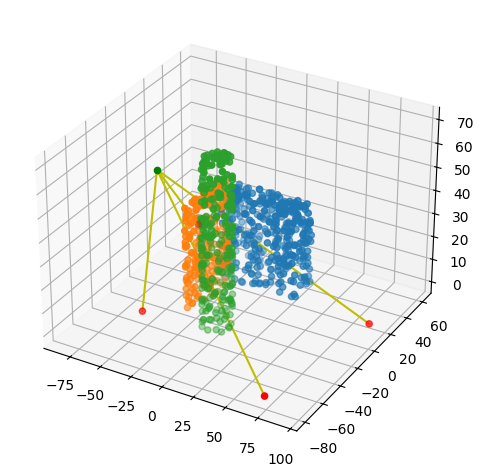

In [8]:
# Result Visualization

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for obstacle in obstacle_ls:
    obstacle.plot(ax)
    logging.info(f"Obstacle.points.shape: {obstacle.points.shape}")
    
ax.scatter(gnd_nodes[:, 0], gnd_nodes[:, 1], gnd_nodes[:, 2], c='r')
ax.scatter(max_idx[0]-(hparams.area_size//2), max_idx[1]-(hparams.area_size//2), 70, c='g')
for gnd_node in gnd_nodes:
    ax.plot([gnd_node[0], max_idx[0]-(hparams.area_size//2)], [gnd_node[1], max_idx[1]-(hparams.area_size//2)], [gnd_node[2], 70], c='y')

fig.tight_layout()
plt.show()

INFO:root:Obstacle.points.shape: (3, 340)
INFO:root:Obstacle.points.shape: (3, 217)
INFO:root:Obstacle.points.shape: (3, 234)
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


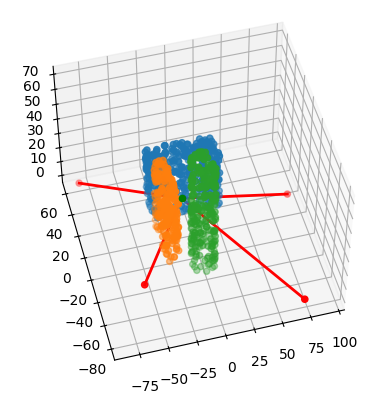

In [9]:
# save result as animation gif

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('persp')
for obstacle in obstacle_ls:
    obstacle.plot(ax)
    logging.info(f"Obstacle.points.shape: {obstacle.points.shape}")
    
ax.scatter(gnd_nodes[:, 0], gnd_nodes[:, 1], gnd_nodes[:, 2], c='r')
ax.scatter(max_idx[0]-(hparams.area_size//2), max_idx[1]-(hparams.area_size//2), 70, c='g')
for gnd_node in gnd_nodes:
    ax.plot([gnd_node[0], max_idx[0]-(hparams.area_size//2)], [gnd_node[1], max_idx[1]-(hparams.area_size//2)], [gnd_node[2], 70], c='r', linewidth=2)

def update(i):
    ax.view_init(elev=50, azim=255+i)  # 시점의 높이를 높여 선이 더 잘 보이도록 설정


anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100)

anim.save("./results/brute_force/anim.gif", writer='imagemagick')


INFO:root:Obstacle.points.shape: (3, 340)
INFO:root:Obstacle.points.shape: (3, 217)
INFO:root:Obstacle.points.shape: (3, 234)


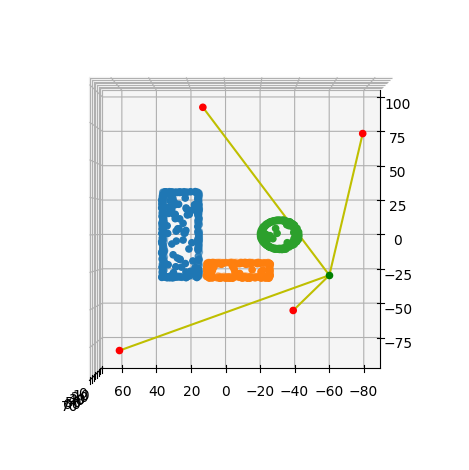

In [10]:
# Save the top view as image

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=180)
for obstacle in obstacle_ls:
    obstacle.plot(ax)
    logging.info(f"Obstacle.points.shape: {obstacle.points.shape}")
    
ax.scatter(gnd_nodes[:, 0], gnd_nodes[:, 1], gnd_nodes[:, 2], c='r')
ax.scatter(max_idx[0]-(hparams.area_size//2), max_idx[1]-(hparams.area_size//2), 70, c='g')
for gnd_node in gnd_nodes:
    ax.plot([gnd_node[0], max_idx[0]-(hparams.area_size//2)], [gnd_node[1], max_idx[1]-(hparams.area_size//2)], [gnd_node[2], 70], c='y')

fig.tight_layout()
plt.savefig("./results/brute_force/top.png")
plt.show()